<h1 style="color:#3498db">IMDb Top 1000 Data Analysis and Regression</h1>

<h2 style="color:#e74c3c">Introduction</h2>
This notebook aims to perform analysis and build a regression model on the IMDb Top 1000 dataset.

## <span style="color:#9b59b6">Step 1: Importing Libraries</span>

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Activation,Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix

## <span style="color:#9b59b6">Step 2: Uploading the Data Set and Getting General Information</span>

In [28]:
data=pd.read_csv('imdb_top_1000.csv')
data.head()

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"


In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Poster_Link    1000 non-null   object 
 1   Series_Title   1000 non-null   object 
 2   Released_Year  1000 non-null   object 
 3   Certificate    899 non-null    object 
 4   Runtime        1000 non-null   object 
 5   Genre          1000 non-null   object 
 6   IMDB_Rating    1000 non-null   float64
 7   Overview       1000 non-null   object 
 8   Meta_score     843 non-null    float64
 9   Director       1000 non-null   object 
 10  Star1          1000 non-null   object 
 11  Star2          1000 non-null   object 
 12  Star3          1000 non-null   object 
 13  Star4          1000 non-null   object 
 14  No_of_Votes    1000 non-null   int64  
 15  Gross          831 non-null    object 
dtypes: float64(2), int64(1), object(13)
memory usage: 125.1+ KB


In [30]:
data.shape

(1000, 16)

In [31]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
IMDB_Rating,1000.0,7.94930,0.275491,7.6,7.70,7.9,8.10,9.3
Meta_score,843.0,77.97153,12.376099,28.0,70.00,79.0,87.00,100.0
No_of_Votes,1000.0,273692.91100,327372.703934,25088.0,55526.25,138548.5,374161.25,2343110.0


In [32]:
data.isnull().sum()

Poster_Link        0
Series_Title       0
Released_Year      0
Certificate      101
Runtime            0
Genre              0
IMDB_Rating        0
Overview           0
Meta_score       157
Director           0
Star1              0
Star2              0
Star3              0
Star4              0
No_of_Votes        0
Gross            169
dtype: int64

## <span style="color:#9b59b6">Step 3: Filling in Missing Data</span>

In [33]:
data['Meta_score'].fillna(data['Meta_score'].mean(), inplace=True)
data.isnull().sum()

Poster_Link        0
Series_Title       0
Released_Year      0
Certificate      101
Runtime            0
Genre              0
IMDB_Rating        0
Overview           0
Meta_score         0
Director           0
Star1              0
Star2              0
Star3              0
Star4              0
No_of_Votes        0
Gross            169
dtype: int64

## <span style="color:#9b59b6">Step 4: Examining Data Relationships</span>

## <span style="color:#9b59b6">Step 5: Data Visualization</span>

<Axes: xlabel='IMDB_Rating', ylabel='Count'>

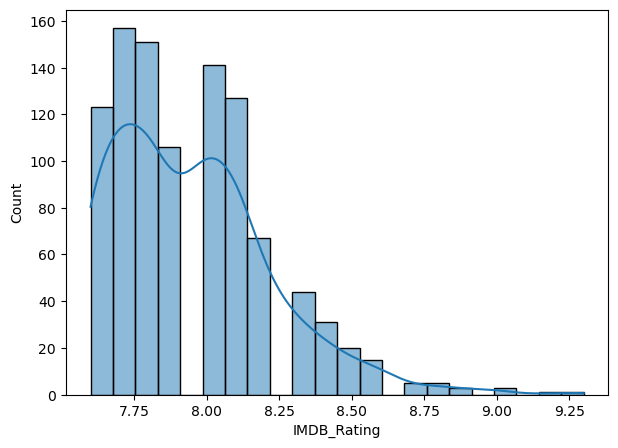

In [34]:
plt.figure(figsize=(7,5))
sns.histplot(data['IMDB_Rating'],kde=True)

<Axes: xlabel='No_of_Votes', ylabel='IMDB_Rating'>

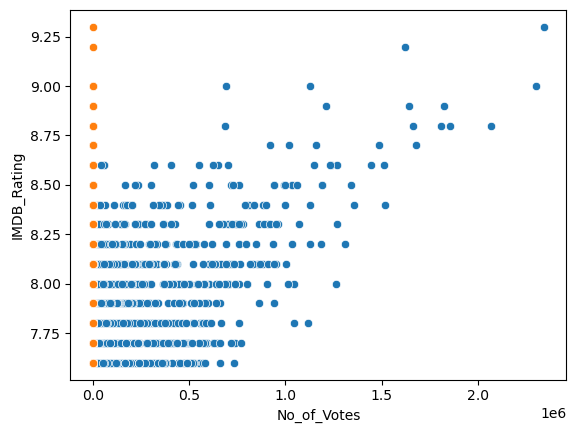

In [35]:
sns.scatterplot(x='No_of_Votes',y='IMDB_Rating',data=data)
sns.scatterplot(x='Meta_score',y='IMDB_Rating',data=data)

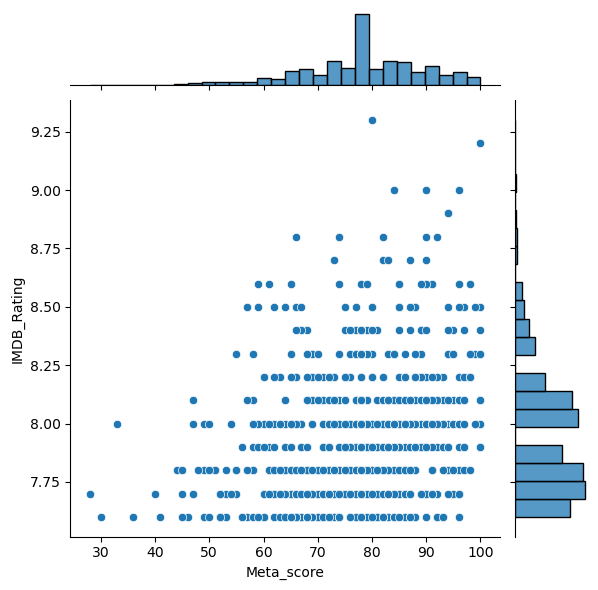

In [36]:
sns.jointplot(x='Meta_score', y='IMDB_Rating', data=data, kind='scatter')

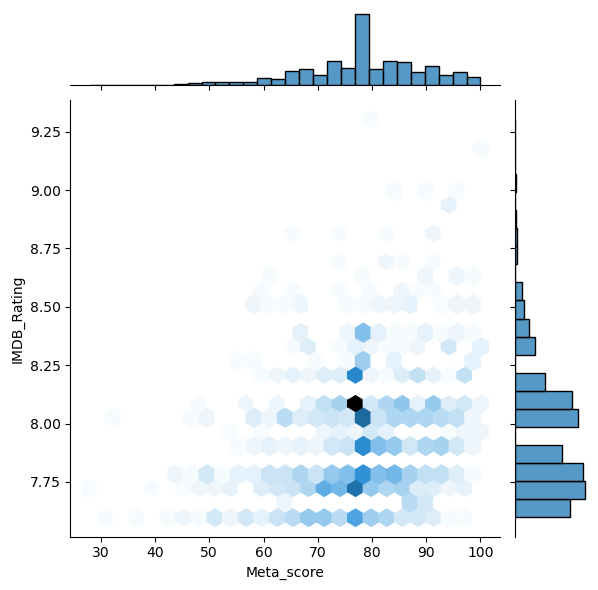

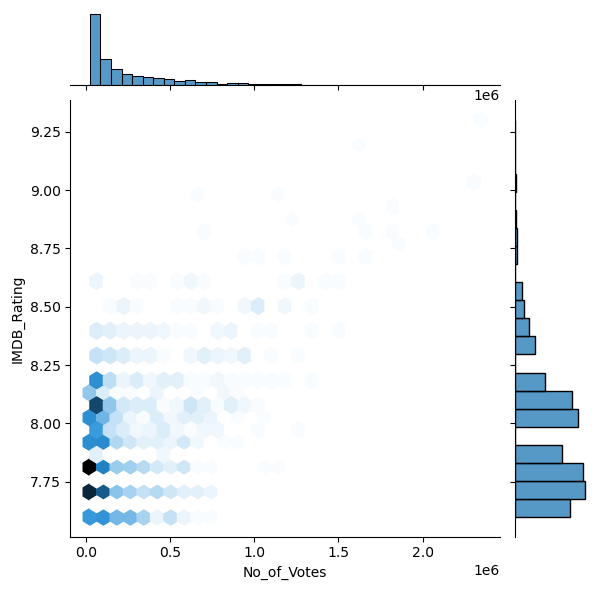

In [37]:
sns.jointplot(x='Meta_score', y='IMDB_Rating', data=data, kind='hex')
sns.jointplot(x='No_of_Votes', y='IMDB_Rating', data=data, kind='hex')

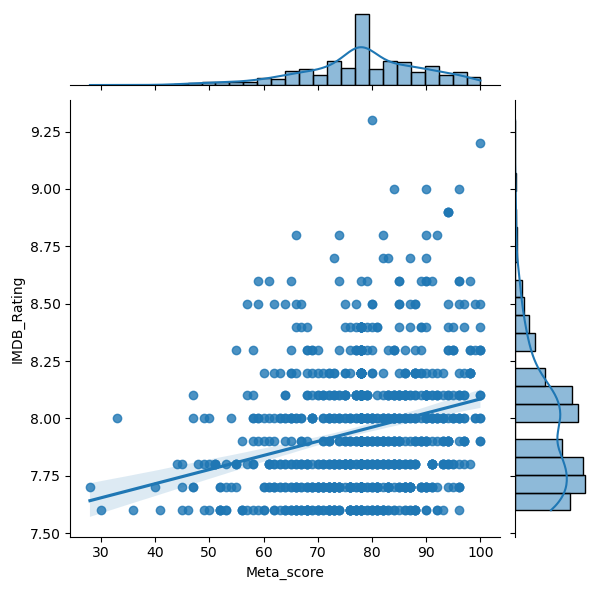

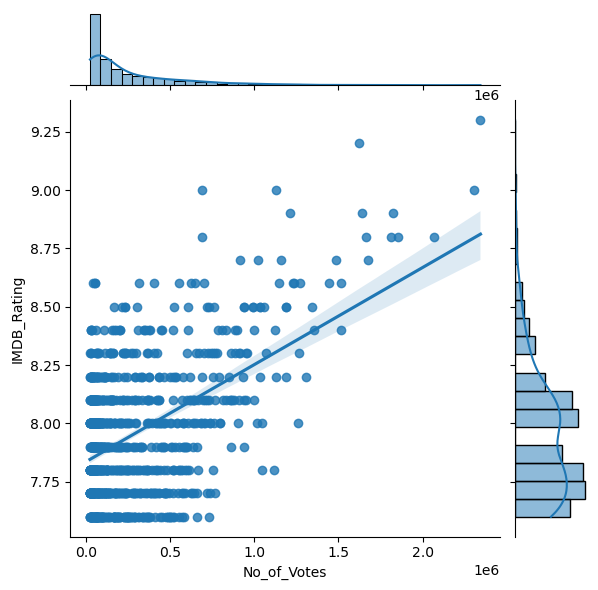

In [38]:
sns.jointplot(x='Meta_score', y='IMDB_Rating', data=data, kind='reg')
sns.jointplot(x='No_of_Votes', y='IMDB_Rating', data=data, kind='reg')

## <span style="color:#9b59b6">Step 6: Data Preparation and Preprocessing</span>

In [39]:
yuksekveri = data['Meta_score'].value_counts().index[0]

# çeyrekler arası mesafeyi hesapla
q1, q3 = np.percentile(data['No_of_Votes'], [25, 75])
iqr = q3 - q1

# aykırı değerleri bul
outliers = data[data['No_of_Votes'] < q1 - 1.5 * iqr]
outliers = data[data['No_of_Votes'] > q3 + 1.5 * iqr]


# en yüksek değeri başka bir dataframe'e at
yeniData = data[data['Meta_score'] != yuksekveri]
yeniData=outliers

In [40]:
yeniData=pd.DataFrame(yeniData[['IMDB_Rating','No_of_Votes','Meta_score']])

## <span style="color:#9b59b6">Step 7: Split data for testing and training</span>

In [41]:
y=yeniData['IMDB_Rating'].values
x=yeniData.drop('IMDB_Rating',axis=1).values

In [42]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=15)

## <span style="color:#9b59b6">Step 8: Scaling Data</span>

In [43]:
scaler=StandardScaler()
scaler.fit(x_train)
x_train=scaler.transform(x_train)
x_test=scaler.transform(x_test)

## <span style="color:#9b59b6">Step 9: Creating and Training an Artificial Neural Network Model</span>

In [44]:
model=Sequential()
model.add(Dense(10, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(10, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(10, activation='relu'))

model.add(Dense(1))
model.compile(loss='mse', optimizer=Adam(learning_rate=0.01))

In [45]:
earlyStopping=EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=25)

In [46]:
model.fit(x=x_train,y=y_train,epochs=300,validation_data=(x_test,y_test),verbose=1,callbacks=[earlyStopping])

Epoch 1/300
2/2 [==============================] - 1s 106ms/step - loss: 67.8896 - val_loss: 61.1933
Epoch 2/300
2/2 [==============================] - 0s 22ms/step - loss: 61.5631 - val_loss: 56.1067
Epoch 3/300
2/2 [==============================] - 0s 22ms/step - loss: 57.2521 - val_loss: 50.5866
Epoch 4/300
2/2 [==============================] - 0s 22ms/step - loss: 54.4400 - val_loss: 44.5620
Epoch 5/300
2/2 [==============================] - 0s 23ms/step - loss: 42.9010 - val_loss: 38.0098
Epoch 6/300
2/2 [==============================] - 0s 21ms/step - loss: 39.0480 - val_loss: 31.2462
Epoch 7/300
2/2 [==============================] - 0s 22ms/step - loss: 28.2313 - val_loss: 24.5435
Epoch 8/300
2/2 [==============================] - 0s 22ms/step - loss: 28.6945 - val_loss: 18.3865
Epoch 9/300
2/2 [==============================] - 0s 25ms/step - loss: 25.6135 - val_loss: 13.3108
Epoch 10/300
2/2 [==============================] - 0s 24ms/step - loss: 23.6497 - val_loss: 9.9132

2/2 [==============================] - 0s 21ms/step - loss: 2.1834 - val_loss: 0.2837
Epoch 84/300
2/2 [==============================] - 0s 21ms/step - loss: 1.6550 - val_loss: 0.3449
Epoch 85/300
2/2 [==============================] - 0s 21ms/step - loss: 2.5370 - val_loss: 0.2834
Epoch 86/300
2/2 [==============================] - 0s 22ms/step - loss: 1.8906 - val_loss: 0.2022
Epoch 87/300
2/2 [==============================] - 0s 22ms/step - loss: 1.8578 - val_loss: 0.1200
Epoch 88/300
2/2 [==============================] - 0s 24ms/step - loss: 1.0627 - val_loss: 0.1007
Epoch 89/300
2/2 [==============================] - 0s 27ms/step - loss: 1.6819 - val_loss: 0.1031
Epoch 90/300
2/2 [==============================] - 0s 23ms/step - loss: 1.6136 - val_loss: 0.0902
Epoch 91/300
2/2 [==============================] - 0s 23ms/step - loss: 1.5722 - val_loss: 0.0878
Epoch 92/300
2/2 [==============================] - 0s 23ms/step - loss: 0.9865 - val_loss: 0.1115
Epoch 93/300
2/2 [=====

## <span style="color:#9b59b6">Step 10: Evaluation of the Model</span>

<Axes: >

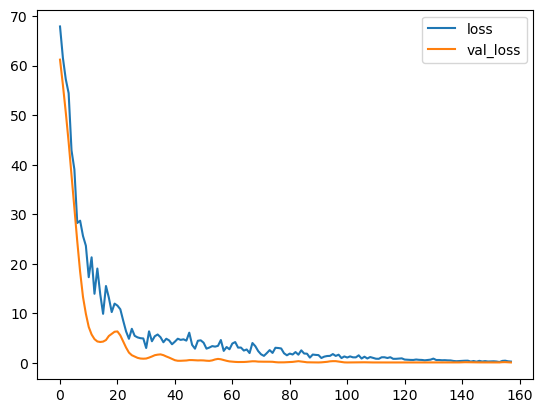

In [47]:
modelKaybi=pd.DataFrame(model.history.history)
modelKaybi.plot()

## <span style="color:#9b59b6">Step 11: Interpretation of Results</span>

In [48]:
tahminDizi=model.predict(x_test)
mean_absolute_error(y_test,tahminDizi)

1/1 [==============================] - 0s 46ms/step


0.24288742231286103

In [49]:
df = pd.DataFrame({
    'Tahminler': tahminDizi.flatten(),
    'Gerçek Değerler': y_test.flatten()
})

df.head(10)

,Tahminler,Gerçek Değerler
0,8.160706,8.6
1,8.389299,8.4
2,8.281207,8.3
3,8.261219,7.9
4,8.305711,8.5
5,8.284996,8.3
6,8.323923,7.8
7,8.278381,8.1
8,8.210525,8.3
9,8.302721,8.1
